In [29]:
import numpy as np
import choix
import opt_fair
from scipy.optimize import minimize
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
from matplotlib import colors
import seaborn as sns

In [30]:
size = 100 #number of items
min_size = 30 
maj_size = size - min_size
num_reviewers = 50 #number of reviewers
pair_per_reviewer = 100 #number of pairs evaluated per reviewer

In [31]:
np.random.seed(1234)
maxv=   5
minv=  -5
original = np.random.uniform(minv,maxv ,size = size)

In [32]:
np.random.seed(1)

# Generate bias arrays
revs_bias_unif = np.random.uniform(-5, 5, size=num_reviewers)
np.random.seed(2)
revs_bias_normal = np.random.normal(0, 2, size=num_reviewers)
np.random.seed(1)
revs_bias_exp = np.random.exponential(2, size=num_reviewers)

# Compute biased scores for each bias array
biased_scores_unif = opt_fair._create_matrix_biased_scores(original, revs_bias_unif, classes)
biased_scores_normal = opt_fair._create_matrix_biased_scores(original, revs_bias_normal, classes)
biased_scores_exp = opt_fair._create_matrix_biased_scores(original, revs_bias_exp, classes)

# Create PC set for each bias array
revs_set_unif = opt_fair._create_pc_set_for_reviewers(biased_scores_unif, pair_per_reviewer)
revs_set_normal = opt_fair._create_pc_set_for_reviewers(biased_scores_normal, pair_per_reviewer)
revs_set_exp = opt_fair._create_pc_set_for_reviewers(biased_scores_exp, pair_per_reviewer)

# Create pairwise comparisons with reviewers for each bias array
pc_with_revs_unif = opt_fair.Pairwise_with_rev(data=revs_set_unif, penalty=0, classes=classes)
pc_with_revs_normal = opt_fair.Pairwise_with_rev(data=revs_set_normal, penalty=0, classes=classes)
pc_with_revs_exp = opt_fair.Pairwise_with_rev(data=revs_set_exp, penalty=0, classes=classes)

# Perform alternate optimization for each bias array
annot_bt_unif, annot_bias_unif = opt_fair._alternate_optim(size, num_reviewers, pc_with_revs_unif, iters=100)
annot_bt_normal, annot_bias_normal = opt_fair._alternate_optim(size, num_reviewers, pc_with_revs_normal, iters=100)
annot_bt_exp, annot_bias_exp = opt_fair._alternate_optim(size, num_reviewers, pc_with_revs_exp, iters=100)

/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/antonioferrara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

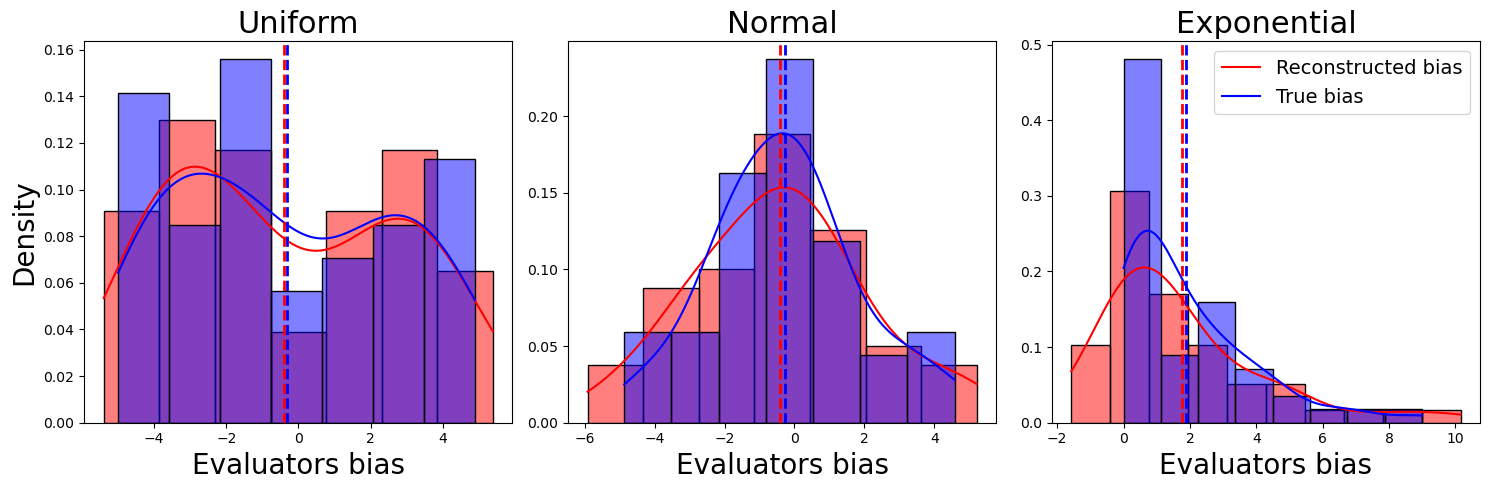

In [33]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1 - revs_bias_unif
sns.histplot(annot_bias_unif, kde=True, stat='density',  color='red', ax=axes[0])
sns.histplot(revs_bias_unif, kde=True, stat='density',  color='blue', ax=axes[0])
axes[0].axvline(annot_bias_unif.mean(), color='red', linestyle='--', linewidth=2)
axes[0].axvline(revs_bias_unif.mean(), color='blue', linestyle='--', linewidth=2)
axes[0].set_xlabel('Evaluators bias', fontsize=20)
axes[0].set_ylabel('Density', fontsize=20)
axes[0].set_title('Uniform', fontsize=22)
#axes[0].tick_params(labelsize=12)


# Plot 2 - revs_bias_normal
sns.histplot(annot_bias_normal, kde=True, stat='density',  color='red',  ax=axes[1])
sns.histplot(revs_bias_normal, kde=True, stat='density',  color='blue',  ax=axes[1])
axes[1].axvline(annot_bias_normal.mean(), color='red', linestyle='--', linewidth=2)
axes[1].axvline(revs_bias_normal.mean(), color='blue', linestyle='--', linewidth=2)
axes[1].set_xlabel('Evaluators bias', fontsize=20)
axes[1].set_ylabel('', fontsize=20)
axes[1].set_title('Normal', fontsize=22)


# Plot 3 - revs_bias_exp
sns.histplot(annot_bias_exp, kde=True, stat='density',  color='red',  ax=axes[2])
sns.histplot(revs_bias_exp, kde=True, stat='density',  color='blue',  ax=axes[2])
axes[2].axvline(annot_bias_exp.mean(), color='red', linestyle='--', linewidth=2)
axes[2].axvline(revs_bias_exp.mean(), color='blue', linestyle='--', linewidth=2)
axes[2].set_xlabel('Evaluators bias', fontsize=20)
axes[2].set_ylabel('', fontsize=20)
axes[2].set_title('Exponential', fontsize=22)


# Adjust layout
plt.tight_layout()

axes[2].legend(labels=['Reconstructed bias', 'True bias'], fontsize=14)

#plt.savefig("../plots/evaluators_distrib.pdf", bbox_inches="tight")

# Show the plot
plt.show()



In [109]:
%%time
np.random.seed(44)

original = np.random.uniform(minv,maxv ,size = size)

revs_bias_unif = np.random.uniform(-5,5, size=num_reviewers)


biased_scores = opt_fair._create_matrix_biased_scores(original,revs_bias_unif,classes)
revs_set =  opt_fair._create_pc_set_for_reviewers(biased_scores,pair_per_reviewer)

pc_with_revs = opt_fair.Pairwise_with_rev(data = revs_set, penalty = 0, classes = classes)
annot_bt,annot_bias =  opt_fair._alternate_optim(size, num_reviewers, pc_with_revs, iters = 100)

MSE = np.square(np.subtract(annot_bias, [x for x in revs_bias_unif])).mean()


print(MSE)

0.2983203925946343
CPU times: user 16.4 s, sys: 11.7 s, total: 28 s
Wall time: 3.77 s


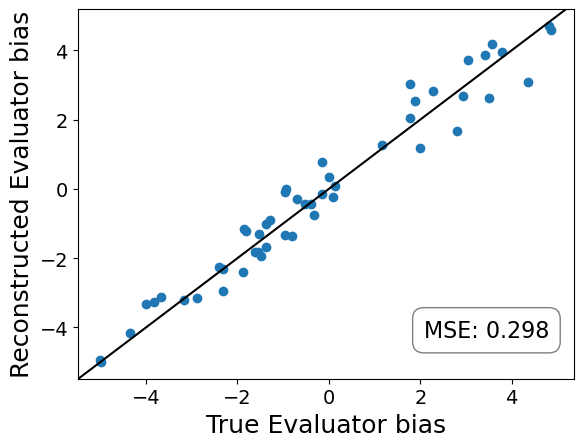

In [110]:
plt.scatter(revs_bias_unif,annot_bias)
#plt.xlim([-6,6])
#plt.ylim([-6,6])
plt.axline([0, 0], slope=1, color = 'black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('True Evaluator bias', fontsize=18)
plt.ylabel('Reconstructed Evaluator bias', fontsize=18)


bbox_props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black', alpha=0.5)
plt.text(0.95, 0.1, f"MSE: {MSE:.3f}", transform=plt.gca().transAxes, va='bottom', ha='right', fontsize=16, bbox=bbox_props)


plt.savefig("../plots/annotators_bias.pdf", bbox_inches="tight")
plt.show()